In [395]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg, fmin_ncg, fmin_bfgs
from sklearn.preprocessing import StandardScaler

In [78]:
data = loadmat('ex5data1', mat_dtype=True)

In [170]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

In [171]:
X = np.insert(X,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)

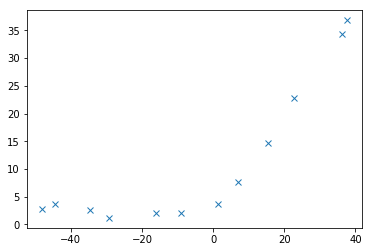

In [129]:
plt.plot(X[:,1],y,linestyle='',marker='x')
plt.show()

In [137]:
def cost(theta, X, y, lmbd):
    m = y.size
    tht = theta.reshape(theta.size,1)
#     print(y.shape)
    return (((X.dot(tht)-y)**2).sum() + lmbd*(tht[1:]**2).sum())/2/m

def grad(theta, X, y, lmbd):
    m = y.size
    tht = theta.reshape(theta.size,1)
    grd = (X.T.dot(X.dot(tht)-y) + lmbd*np.insert(tht[1:],0,0,axis=0))/m
    return grd.flatten()

In [134]:
theta_init = np.ones(2)
lmbd = 1
print(cost(theta_init,X,y,1))
grad(theta_init,X,y,1)

(12, 1)
303.99319222


array([ -15.30301567,  598.25074417])

In [148]:
theta_lin = fmin_ncg(cost, theta_init, fprime=grad, args=(X[:11],y[:11],lmbd))

Optimization terminated successfully.
         Current function value: 24.323253
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 22
         Hessian evaluations: 0


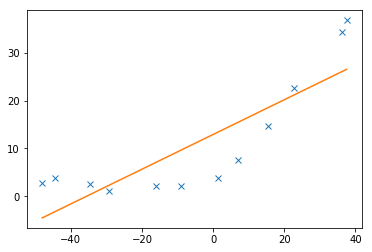

In [258]:
plt.plot(X[:,1],y,linestyle='',marker='x')
plt.plot(np.linspace(X[:,1].min(), X[:,1].max(), 2), np.linspace(X.min(), X.max(), 2)*theta_lin[1] + theta_lin[0])
plt.show()

In [77]:
Xval.shape

(21, 2)

In [324]:
Xval.shape

(21, 2)

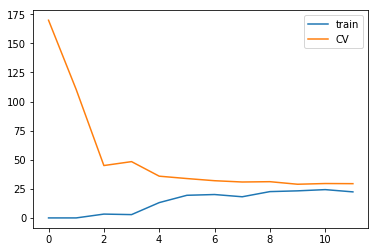

In [325]:
m = y.size
error_train, error_val = np.empty(m), np.empty(m)
lmbd = 0
theta_init = np.ones(2)
for i in range(1,m+1,1):
#     print(y[:i])
    res = fmin_ncg(cost, theta_init, fprime=grad, args=(X[:i],y[:i],lmbd), disp=False)
    error_train[i-1] = cost(res,X[:i],y[:i],0)
    error_val[i-1] = cost(res,Xval,yval,0)
plt.plot(error_train, label="train")
plt.plot(error_val, label="CV")
plt.legend()
plt.show()

In [380]:
def polyX(X,p,Xval,Xtest):
    X_p = X.copy()
    X_vp = Xval.copy()
    X_tp = Xtest.copy()
    X_boundary = np.linspace(1.5*X[:,0].min(), 1.7*X[:,0].max(), 100).reshape(100,1)
    for i in range(2,p+1,1):
        X_p = np.concatenate((X_p, X_p[:,[-1]]*X_p[:,[0]]), axis=1)
        X_vp = np.concatenate((X_vp, X_vp[:,[-1]]*X_vp[:,[0]]), axis=1)
        X_tp = np.concatenate((X_tp, X_tp[:,[-1]]*X_tp[:,[0]]), axis=1)
        X_boundary = np.concatenate((X_boundary, X_boundary[:,[-1]]*X_boundary[:,[0]]), axis=1)
    scaler = StandardScaler()
    X_p = scaler.fit_transform(X_p)
    X_boundary = scaler.transform(X_boundary)
    X_tp = scaler.fit_transform(X_tp)
    X_vp = scaler.fit_transform(X_vp)
    return np.insert(X_p,0,1,axis=1), np.insert(X_boundary,0,1,axis=1), np.insert(X_vp,0,1,axis=1), np.insert(X_tp,0,1,axis=1)

In [381]:
X_p, X_bnd, X_vp, X_tp = polyX(X[:,1:],8,Xval[:,1:],Xtest[:,1:])
theta_init = np.ones(X_p.shape[1])
lmbd = 0
print(cost(theta_init,X_p,y,lmbd))
grad(theta_init,X_p,y,lmbd)

103.653174426


array([-10.21758933,  -9.02356739,  -0.43668793,  -7.64073489,
         1.13604641,  -6.32800778,   2.11358063,  -5.34594533,   2.68928726])

In [294]:
theta_poly = fmin_cg(cost, theta_init, fprime=grad, args=(X_p,y,lmbd), gtol=1e-10)

         Current function value: 0.028890
         Iterations: 1039
         Function evaluations: 2021
         Gradient evaluations: 2009


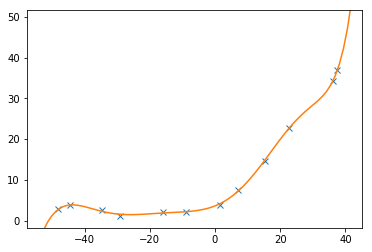

In [303]:
plt.plot(X[:,1],y,linestyle='',marker='x')
plt.plot(np.linspace(1.5*X[:,1].min(), 1.5*X[:,1].max(), 100), X_bnd.dot(theta_poly))
plt.xlim(1.2*X[:,1].min(), 1.2*X[:,1].max())
plt.ylim(-1.5*y.min(), 1.4*y.max())
plt.show()

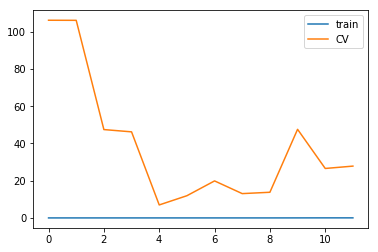

In [320]:
m = y.size
error_train, error_val = np.empty(m), np.empty(m)
lmbd = 0
for i in range(1,m+1,1):
#     print(y[:i])
    res = fmin_ncg(cost, theta_init, fprime=grad, args=(X_p[:i],y[:i],lmbd), disp=False)
    error_train[i-1] = cost(res,X_p[:i],y[:i],0)
    error_val[i-1] = cost(res,X_vp,yval,0)
plt.plot(error_train, label="train")
plt.plot(error_val, label="CV")
plt.legend()
plt.show()

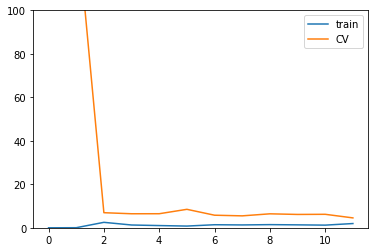

In [361]:
m = y.size
error_train, error_val = np.empty(m), np.empty(m)
lmbd = 1
theta_init = np.ones(X_p.shape[1])
for i in range(1,m+1,1):
#     print(y[:i])
    res = fmin_ncg(cost, theta_init, fprime=grad, args=(X_p[:i],y[:i],lmbd), disp=False)
    error_train[i-1] = cost(res,X_p[:i],y[:i],0)
    error_val[i-1] = cost(res,X_vp,yval,0)
plt.plot(error_train, label="train")
plt.plot(error_val, label="CV")
plt.ylim(0,100)
plt.legend()
plt.show()

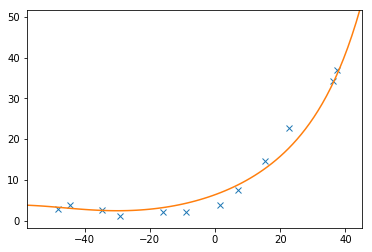

In [317]:
plt.plot(X[:,1],y,linestyle='',marker='x')
plt.plot(np.linspace(1.5*X[:,1].min(), 1.5*X[:,1].max(), 100), X_bnd.dot(res))
plt.xlim(1.2*X[:,1].min(), 1.2*X[:,1].max())
plt.ylim(-1.5*y.min(), 1.4*y.max())
plt.show()

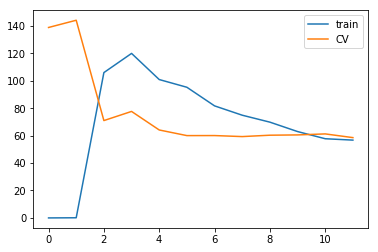

In [382]:
m = y.size
error_train, error_val = np.empty(m), np.empty(m)
lmbd = 100
for i in range(1,m+1,1):
#     print(y[:i])
    res = fmin_ncg(cost, theta_init, fprime=grad, args=(X_p[:i],y[:i],lmbd), disp=False)
    error_train[i-1] = cost(res,X_p[:i],y[:i],0)
    error_val[i-1] = cost(res,X_vp,yval,0)
plt.plot(error_train, label="train")
plt.plot(error_val, label="CV")
plt.legend()
plt.show()

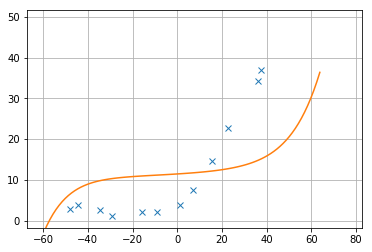

In [384]:
plt.plot(X[:,1],y,linestyle='',marker='x')
plt.plot(np.linspace(1.5*X[:,1].min(), 1.7*X[:,1].max(), 100), X_bnd.dot(res))
plt.xlim(1.4*X[:,1].min(), 2.2*X[:,1].max())
plt.ylim(-1.5*y.min(), 1.4*y.max())
plt.grid()
plt.show()

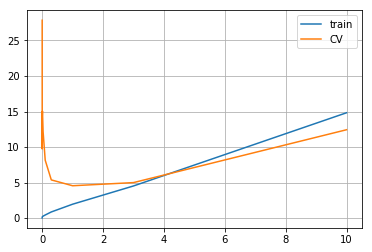

In [398]:
X_p, X_bnd, X_vp, X_tp = polyX(X[:,1:],8,Xval[:,1:],Xtest[:,1:])
lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
l = lambda_vec.size
error_train, error_val = np.empty(l), np.empty(l)
theta_init = np.ones(X_p.shape[1])
i=0
for lmbd in lambda_vec:
    res = fmin_bfgs(cost, theta_init, fprime=grad, args=(X_p[:12],y[:12],lmbd), disp=False, gtol=1e-10)
    error_train[i] = cost(res,X_p,y,0)
    error_val[i] = cost(res,X_vp,yval,0)
    i += 1
plt.plot(lambda_vec, error_train, label="train")
plt.plot(lambda_vec, error_val, label="CV")
plt.legend()
plt.grid()
plt.show()

In [407]:
theta_poly = fmin_cg(cost, theta_init, fprime=grad, args=(X_p,y,.5), gtol=1e-10)

         Current function value: 4.179411
         Iterations: 63
         Function evaluations: 110
         Gradient evaluations: 109


In [408]:
cost(theta_poly, X_tp, ytest, 0)

7.4821276787371387

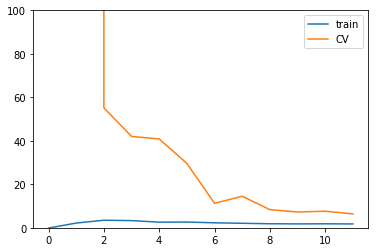

In [459]:
m = y.size
error_train, error_val = np.empty(m), np.empty(m)
lmbd = 1
theta_init = np.ones(X_p.shape[1])
for i in range(1,m+1,1):
#     print(y[:i])
    for j in range(50):
        indicies = np.random.choice(X_p.shape[0], i)
        res = fmin_ncg(cost, theta_init, fprime=grad, args=(X_p[indicies],y[indicies],lmbd), disp=False)
        error_train[i-1] += cost(res,X_p[indicies],y[indicies],0)
        indicies_cv = np.random.choice(X_vp.shape[0], i)
        error_val[i-1] += cost(res,X_vp[indicies_cv],yval[indicies_cv],0)
error_train /= 50
error_val /= 50
plt.plot(error_train, label="train")
plt.plot(error_val, label="CV")
plt.ylim(0,100)
plt.legend()
plt.show()